In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

# fit_out and intensities folders
fit_outs_folder = './data/fit_outs/'
intensities_folder = './data/Idts/'

### Load fit parameters and scan infos

In [11]:
### LOAD FIT OUT ###

# get file names

fit_out_files = os.listdir(fit_outs_folder)
fit_out_files.sort()
fit_out_files = [f for f in fit_out_files if f.startswith('fit_out_')]

# load fit parameters
fit_outs = {}
for f in fit_out_files:
    fit_outs[f[8:-4]] = pd.read_csv(fit_outs_folder + f)
    fit_outs[f[8:-4]]['scan'] = f[8:-4]


# generate dataframe
fit_outs_df = pd.DataFrame()
for i in fit_outs.keys():
    fit_outs_df = pd.concat([fit_outs_df,fit_outs[i]])
fit_outs_df = fit_outs_df.set_index('scan') # make scan the index
fit_outs = fit_outs_df
del fit_outs_df


### LOAD SCAN_INFO.CSV ###
scan_info = pd.read_csv('./data/scan_info.csv', comment='#')
scan_info = scan_info.set_index('scan')


### ADD INFORMATIONS TO FIT OUT ###
# make a dictionary of scan_info
scan_info_dict = {}
for i in scan_info.index:
    scan_info_dict[i] = {}
    for j in scan_info.columns:
        scan_info_dict[i][j] = scan_info[j][i]
# add information to fit_outs dataframe
fit_outs['ID_sample'] = [scan_info_dict[i]['ID_sample'] for i in fit_outs.index]
fit_outs['T'] = [scan_info_dict[i]['T'] for i in fit_outs.index]
fit_outs['d'] = [scan_info_dict[i]['d'] for i in fit_outs.index]
fit_outs['E'] = [scan_info_dict[i]['E'] for i in fit_outs.index]
fit_outs['Q'] = [scan_info_dict[i]['Q'] for i in fit_outs.index]
fit_outs['cooling'] = [scan_info_dict[i]['cooling'] for i in fit_outs.index]
fit_outs['fresh'] = [scan_info_dict[i]['fresh'] for i in fit_outs.index]
fit_outs['test'] = [scan_info_dict[i]['test'] for i in fit_outs.index]
fit_outs['att'] = [scan_info_dict[i]['att'] for i in fit_outs.index]

display(scan_info.head())
display(fit_outs.head())

fit_outs.to_csv(fit_outs_folder + 'XBaldi.csv')

,ID_sample,T,d,E,Q,fresh,cooling,test,att
scan,,,,,,,,,
GeO2_6_0001_0007,6,30,100,9.7,0.19,NaN,NaN,True,NaN
GeO2_6_0001_0008,6,30,100,9.7,0.19,NaN,NaN,True,NaN
GeO2_6_0001_0009,6,30,100,9.7,0.19,NaN,NaN,NaN,NaN
GeO2_6_0001_0011,6,30,100,9.7,0.19,True,NaN,True,NaN
GeO2_6_0001_0012,6,30,100,9.7,0.19,NaN,NaN,NaN,NaN


,t,tau,beta,c,y0,dtau,dbeta,dc,dy0,ID_sample,T,d,E,Q,cooling,fresh,test,att
scan,,,,,,,,,,,,,,,,,,
GeO2_3_100C_0001_0004,256.7,5.431238,0.747810,0.030044,1.002513,0.180624,0.017921,0.000572,0.000015,3,100,100,9.7,0.19,NaN,NaN,NaN,NaN
GeO2_3_170C_0001_0004,77.0,4.609501,0.706555,0.030093,1.002501,0.225025,0.023769,0.000824,0.000039,3,170,100,9.7,0.19,NaN,NaN,NaN,NaN
GeO2_3_240C_0001_0004,77.0,4.258897,0.745483,0.028300,1.002570,0.241318,0.031140,0.000928,0.000043,3,240,100,9.7,0.19,NaN,NaN,NaN,NaN
GeO2_3_30C_0001_0004,146.7,5.974309,0.809289,0.030845,1.002504,0.202564,0.022444,0.000637,0.000025,3,30,100,9.7,0.19,NaN,NaN,NaN,NaN
GeO2_3_310C_0001_0004,77.0,3.619661,0.739548,0.027811,1.002560,0.174577,0.025793,0.000770,0.000032,3,310,100,9.7,0.19,NaN,NaN,NaN,NaN


## Q analysis @ 30C (GeO2_6)

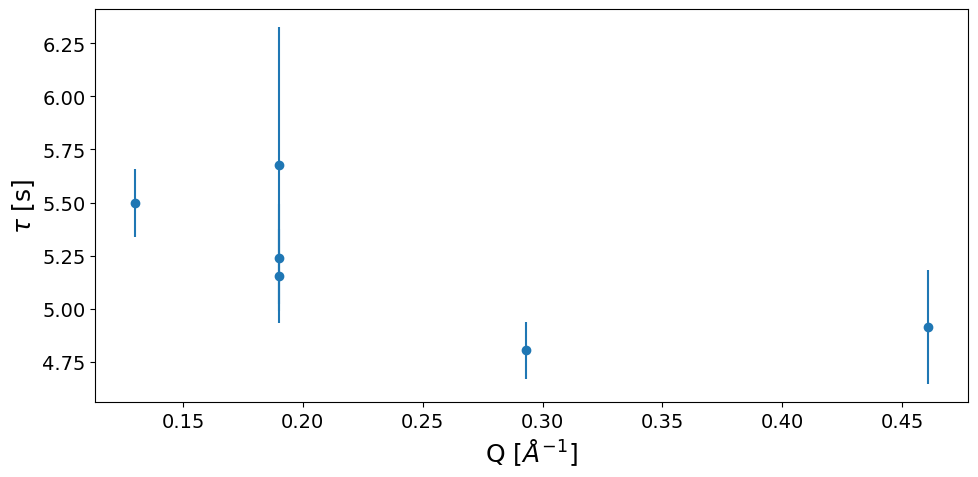

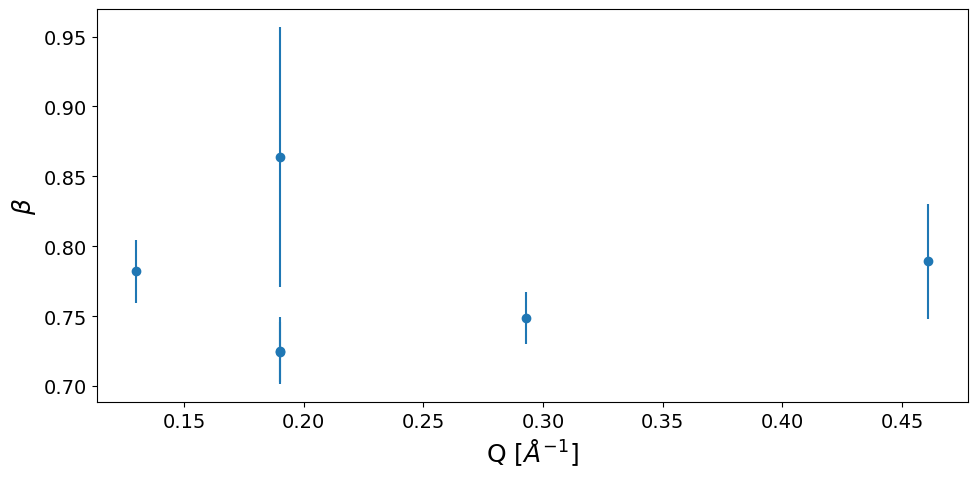

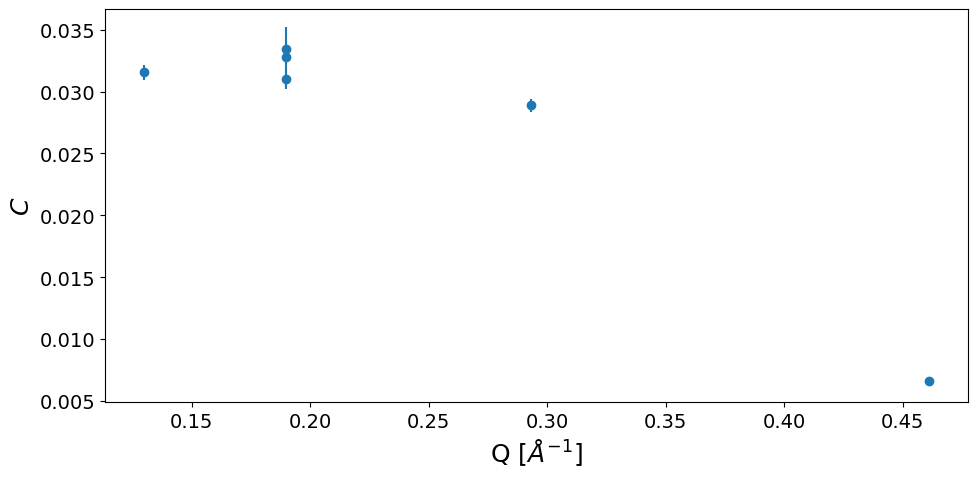

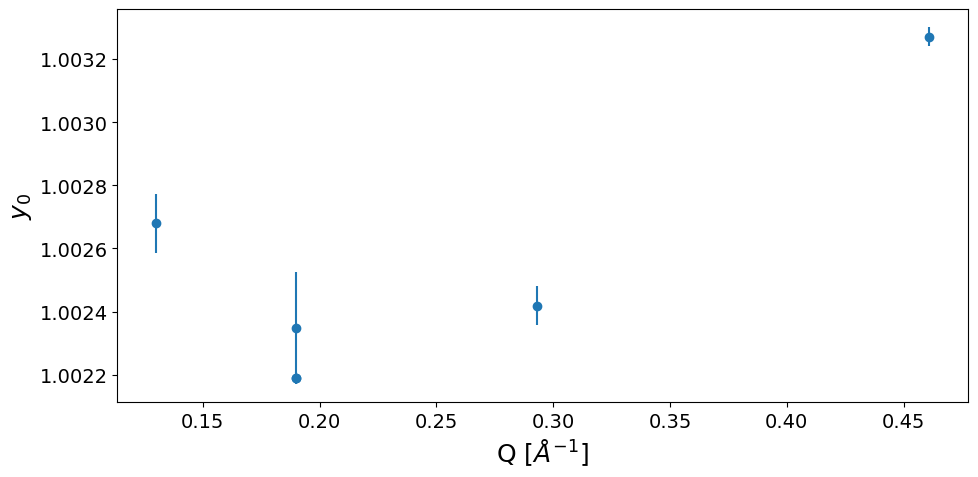

In [14]:
#################################################
idx_6 = fit_outs[(fit_outs.ID_sample==6) & (fit_outs['T']==30) & (fit_outs['test']!=True)].index
#################################################

# tau
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['Q'], fit_outs.loc[idx_6]['tau'], yerr=fit_outs.loc[idx_6]['dtau'], fmt='o')
##plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$\tau$ [s]')
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['Q'], fit_outs.loc[idx_6]['beta'], yerr=fit_outs.loc[idx_6]['dbeta'], fmt='o')
#plt.xscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$\beta$')
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['Q'], fit_outs.loc[idx_6]['c'], yerr=fit_outs.loc[idx_6]['dc'], fmt='o')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$C$')
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['Q'], fit_outs.loc[idx_6]['y0'], yerr=fit_outs.loc[idx_6]['dy0'], fmt='o')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$y_0$')
plt.tight_layout(), plt.show();



## Q analysis @ 730C (GeO2_3)

In [29]:
type(list(fit_outs['att'])[0])

float

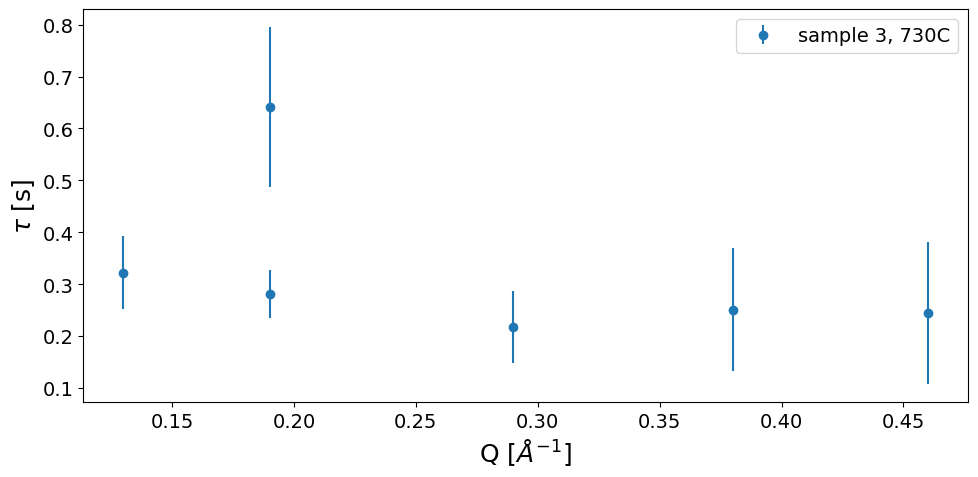

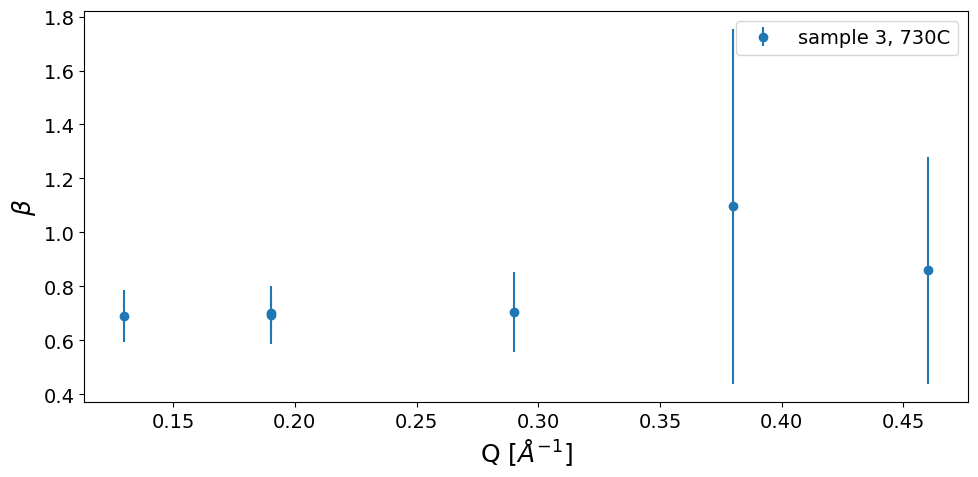

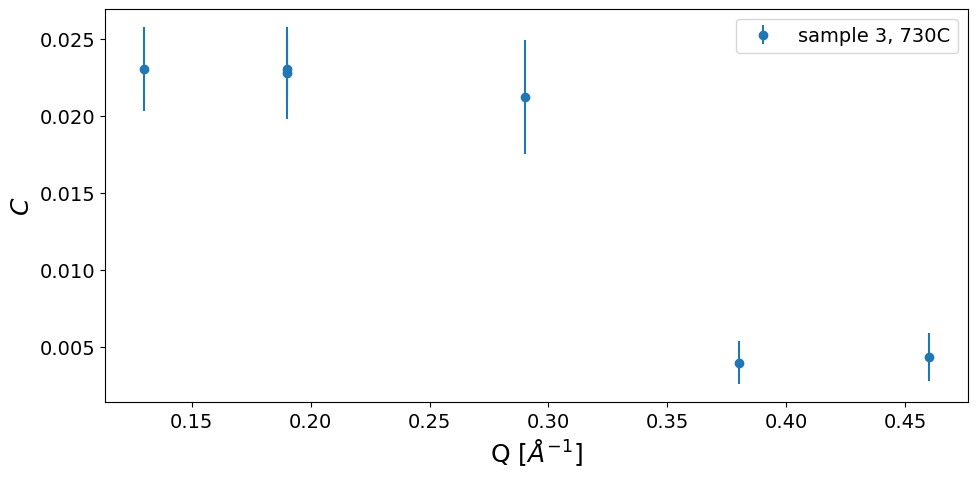

/tmp/ipykernel_293470/517377678.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


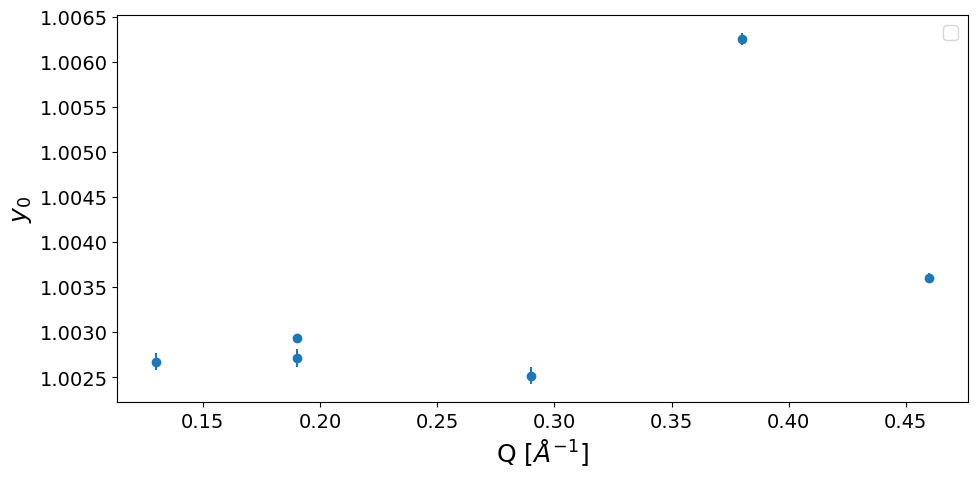

In [27]:
#################################################
idx_3 = fit_outs[(fit_outs.ID_sample==3) & (fit_outs['T']==730) & (fit_outs['test']!=True) & (fit_outs['att'] is not float)].index
#################################################

# tau
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_3]['Q'], fit_outs.loc[idx_3]['tau'], yerr=fit_outs.loc[idx_3]['dtau'], fmt='o', label='sample 3, 730C')
##plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_3]['Q'], fit_outs.loc[idx_3]['beta'], yerr=fit_outs.loc[idx_3]['dbeta'], fmt='o', label='sample 3, 730C')
#plt.xscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_3]['Q'], fit_outs.loc[idx_3]['c'], yerr=fit_outs.loc[idx_3]['dc'], fmt='o', label='sample 3, 730C')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$C$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_3]['Q'], fit_outs.loc[idx_3]['y0'], yerr=fit_outs.loc[idx_3]['dy0'], fmt='o')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();



# Temperature dependence

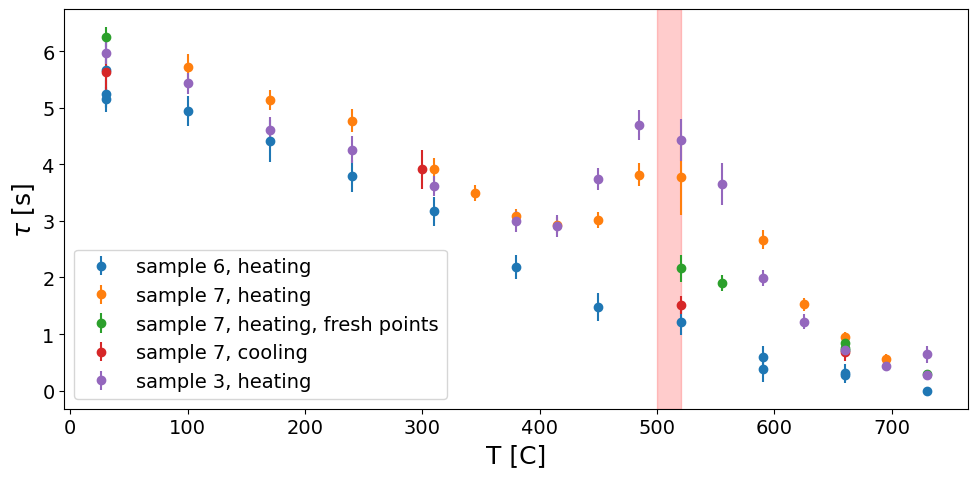

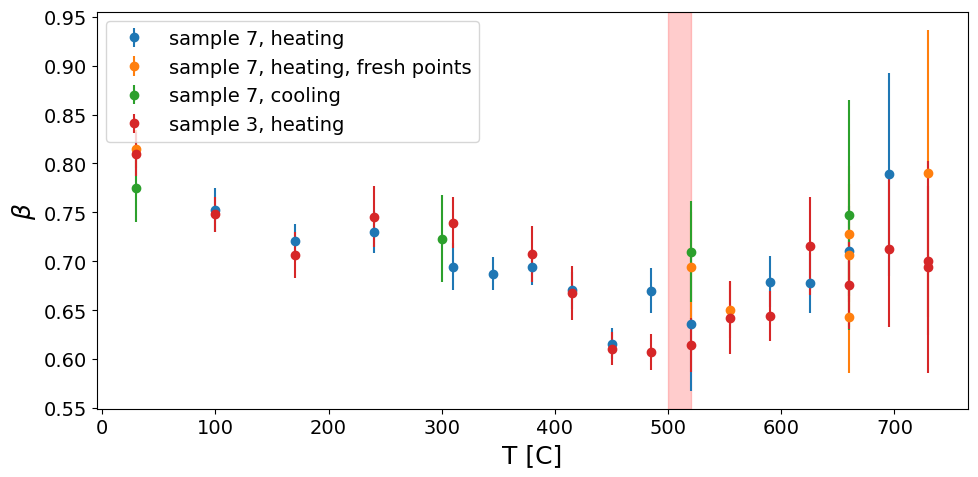

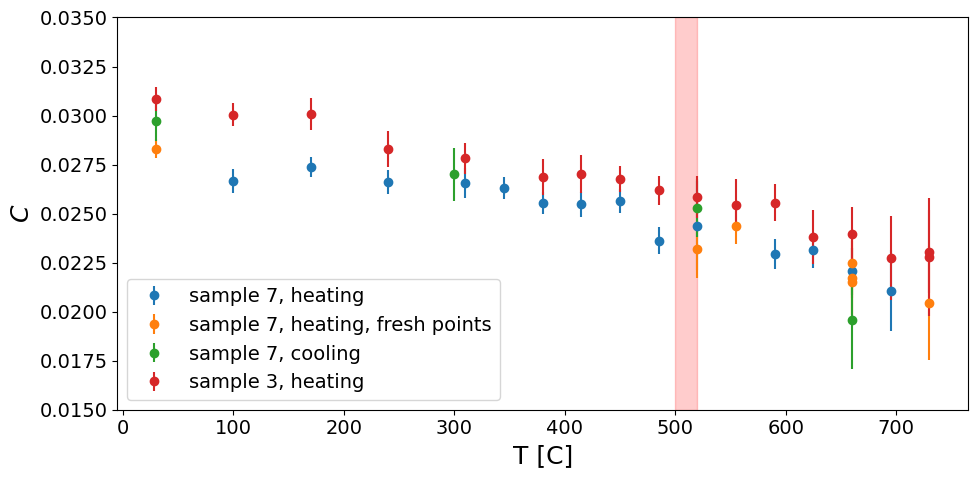

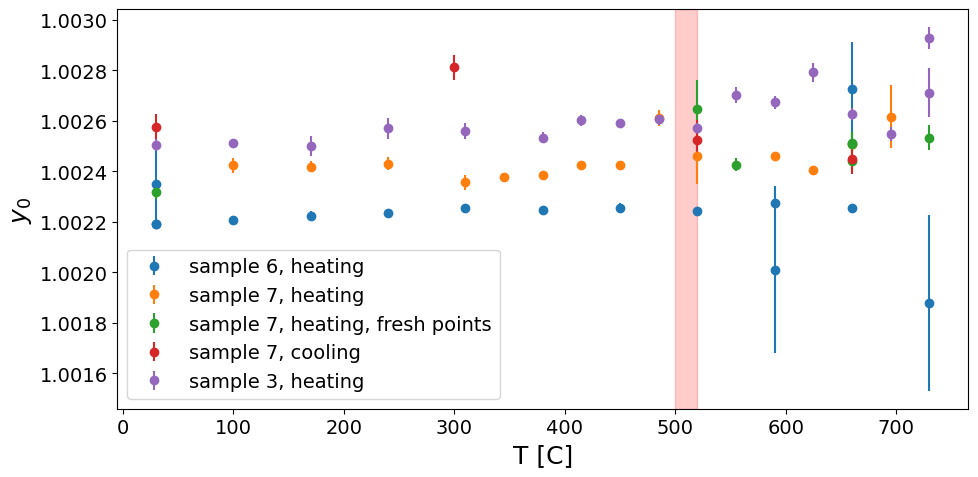

In [6]:
#################################################

idx_6 = fit_outs[(fit_outs.ID_sample==6) & (fit_outs['Q']==.19) & (fit_outs['test']!=True)].index
idx_7 = fit_outs[(fit_outs.ID_sample==7) & (fit_outs['Q']==.19) & (fit_outs['test']!=True) & (fit_outs['cooling']!=True) & (fit_outs['fresh']!=True)].index
idx_7_fresh = fit_outs[(fit_outs.ID_sample==7) & (fit_outs['Q']==.19) & (fit_outs['test']!=True) & (fit_outs['cooling']!=True) & (fit_outs['fresh']==True)].index
idx_7_cooling = fit_outs[(fit_outs.ID_sample==7) & (fit_outs['Q']==.19) & (fit_outs['test']!=True) & (fit_outs['cooling']==True) & (fit_outs['fresh']!=True)].index
idx_3 = fit_outs[(fit_outs.ID_sample==3) & (fit_outs['Q']==.19) & (fit_outs['test']!=True)].index

#################################################


# tau
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['T'], fit_outs.loc[idx_6]['tau'], yerr=fit_outs.loc[idx_6]['dtau'], fmt='o', label='sample 6, heating')
ax.errorbar(fit_outs.loc[idx_7]['T'], fit_outs.loc[idx_7]['tau'], yerr=fit_outs.loc[idx_7]['dtau'], fmt='o', label='sample 7, heating')
ax.errorbar(fit_outs.loc[idx_7_fresh]['T'], fit_outs.loc[idx_7_fresh]['tau'], yerr=fit_outs.loc[idx_7_fresh]['dtau'], fmt='o', label='sample 7, heating, fresh points')
ax.errorbar(fit_outs.loc[idx_7_cooling]['T'], fit_outs.loc[idx_7_cooling]['tau'], yerr=fit_outs.loc[idx_7_cooling]['dtau'], fmt='o', label='sample 7, cooling')
ax.errorbar(fit_outs.loc[idx_3]['T'], fit_outs.loc[idx_3]['tau'], yerr=fit_outs.loc[idx_3]['dtau'], fmt='o', label='sample 3, heating')
plt.axvspan(500, 520, alpha=0.2, color='red')
#plt.yscale('log')
plt.xlabel(r'T [C]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
#ax.errorbar(fit_outs.loc[idx_6]['T'], fit_outs.loc[idx_6]['beta'], yerr=fit_outs.loc[idx_6]['dbeta'], fmt='o', label='sample 6, heating')
ax.errorbar(fit_outs.loc[idx_7]['T'], fit_outs.loc[idx_7]['beta'], yerr=fit_outs.loc[idx_7]['dbeta'], fmt='o', label='sample 7, heating')
ax.errorbar(fit_outs.loc[idx_7_fresh]['T'], fit_outs.loc[idx_7_fresh]['beta'], yerr=fit_outs.loc[idx_7_fresh]['dbeta'], fmt='o', label='sample 7, heating, fresh points')
ax.errorbar(fit_outs.loc[idx_7_cooling]['T'], fit_outs.loc[idx_7_cooling]['beta'], yerr=fit_outs.loc[idx_7_cooling]['dbeta'], fmt='o', label='sample 7, cooling')
ax.errorbar(fit_outs.loc[idx_3]['T'], fit_outs.loc[idx_3]['beta'], yerr=fit_outs.loc[idx_3]['dbeta'], fmt='o', label='sample 3, heating')
plt.axvspan(500, 520, alpha=0.2, color='red')
#plt.yscale('log')
plt.xlabel(r'T [C]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))
#ax.errorbar(fit_outs.loc[idx_6]['T'], fit_outs.loc[idx_6]['c'], yerr=fit_outs.loc[idx_6]['dc'], fmt='o', label='sample 6, heating')
ax.errorbar(fit_outs.loc[idx_7]['T'], fit_outs.loc[idx_7]['c'], yerr=fit_outs.loc[idx_7]['dc'], fmt='o', label='sample 7, heating')
ax.errorbar(fit_outs.loc[idx_7_fresh]['T'], fit_outs.loc[idx_7_fresh]['c'], yerr=fit_outs.loc[idx_7_fresh]['dc'], fmt='o', label='sample 7, heating, fresh points')
ax.errorbar(fit_outs.loc[idx_7_cooling]['T'], fit_outs.loc[idx_7_cooling]['c'], yerr=fit_outs.loc[idx_7_cooling]['dc'], fmt='o', label='sample 7, cooling')
ax.errorbar(fit_outs.loc[idx_3]['T'], fit_outs.loc[idx_3]['c'], yerr=fit_outs.loc[idx_3]['dc'], fmt='o', label='sample 3, heating')
plt.axvspan(500, 520, alpha=0.2, color='red')
#plt.yscale('log')
plt.ylim(.015, .035)
plt.xlabel(r'T [C]')
plt.ylabel(r'$C$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(fit_outs.loc[idx_6]['T'], fit_outs.loc[idx_6]['y0'], yerr=fit_outs.loc[idx_6]['dy0'], fmt='o', label='sample 6, heating')
ax.errorbar(fit_outs.loc[idx_7]['T'], fit_outs.loc[idx_7]['y0'], yerr=fit_outs.loc[idx_7]['dy0'], fmt='o', label='sample 7, heating')
ax.errorbar(fit_outs.loc[idx_7_fresh]['T'], fit_outs.loc[idx_7_fresh]['y0'], yerr=fit_outs.loc[idx_7_fresh]['dy0'], fmt='o', label='sample 7, heating, fresh points')
ax.errorbar(fit_outs.loc[idx_7_cooling]['T'], fit_outs.loc[idx_7_cooling]['y0'], yerr=fit_outs.loc[idx_7_cooling]['dy0'], fmt='o', label='sample 7, cooling')
ax.errorbar(fit_outs.loc[idx_3]['T'], fit_outs.loc[idx_3]['y0'], yerr=fit_outs.loc[idx_3]['dy0'], fmt='o', label='sample 3, heating')
plt.axvspan(500, 520, alpha=0.2, color='red')
#plt.yscale('log')
plt.xlabel(r'T [C]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();

In [7]:
fit_outs.dc/fit_outs.c

scan
GeO2_3_100C_0001_0004    0.019041
GeO2_3_170C_0001_0004    0.027379
GeO2_3_240C_0001_0004    0.032806
GeO2_3_30C_0001_0004     0.020636
GeO2_3_310C_0001_0004    0.027685
                           ...   
GeO2_7_660C_0001_0009    0.078005
GeO2_7_660C_0001_0012    0.086500
GeO2_7_660C_0002_0004    0.127329
GeO2_7_695C_0001_0004    0.098275
GeO2_7_730C_0001_0004    0.143195
Length: 70, dtype: float64

In [8]:
print(fit_outs[scan_info.ID_sample==6].dtau/fit_outs[scan_info.ID_sample==6].tau)

scan
GeO2_6_0001_0007                   0.090442
GeO2_6_0001_0008                   0.036377
GeO2_6_0001_0009                   0.043246
GeO2_6_0001_0011                   0.238524
GeO2_6_0001_0011                   0.106480
GeO2_6_0001_0011                   0.096163
GeO2_6_0001_0011                   0.170935
GeO2_6_0001_0012                   0.048129
GeO2_6_100C_0001_0003              0.054255
GeO2_6_170C_0001_0001              0.082929
GeO2_6_240C_0001_0003              0.074253
GeO2_6_310C_0001_0003              0.081437
GeO2_6_380C_0001_0001              0.098794
GeO2_6_450C_0001_0003              0.170944
GeO2_6_520C_0001_0001              0.187464
GeO2_6_590C_0001_0003              0.320623
GeO2_6_590C_0002_0003              0.617226
GeO2_6_660C_0001_0001              0.412980
GeO2_6_660C_0002_0003              0.550438
GeO2_6_730C_0001_0003             41.640213
GeO2_6q_delcoup_1.75_0001_0001     0.115129
GeO2_6q_delcoup_1_0001_0002        0.029150
GeO2_6q_delcoup_3_0001_0002

/tmp/ipykernel_293470/508052042.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(fit_outs[scan_info.ID_sample==6].dtau/fit_outs[scan_info.ID_sample==6].tau)
/tmp/ipykernel_293470/508052042.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(fit_outs[scan_info.ID_sample==6].dtau/fit_outs[scan_info.ID_sample==6].tau)
